![](img/flags.JPG)
<h1>10 years forecast - USA/MEX/CAN</h1>

# 1.0 Background

Open the TFP.csv file attached.

The series is composed by TFP (rtfpna variable) at constant national prices (2005 = 1) for three countries: United States (USA), Canada (CAN) and Mexico (MEX).

Make an exploratory data analysis;

Forecast 10 years of the series (if you are performing the exercise in R, use package “forecast”);

Check in the following link pages 2 and 3: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf to see a list of all variables in the original dataset. Can you think about another feature that could be helpful in explaining TFP series? Explain

Answer: Month and Year separately for building the charts

## What is TFP (Total Factor Productivity)?


Total-factor productivity (TFP), also called multi-factor productivity, is usually measured as the ratio of aggregate output (e.g., GDP) to aggregate inputs. Under some simplifications about the production technology, growth in 
TFP becomes the portion of growth in output not explained by growth in traditionally measured inputs of labour and capital used in production. TFP is calculated by dividing output by the weighted average of labour and capital 
input, with the standard weighting of 0.7 for labour and 0.3 for capital. Total factor productivity is a measure of economic efficiency and accounts for part of the differences in cross-country per-capita income. The rate of 
TFP growth is calculated by subtracting growth rates of labor and capital inputs from the growth rate of output.

___

# 2.0 Importing libraries

In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy import stats

___

# 3.0 Functions

In [157]:
def boxplot(df,x,y,x_text=None,y_text=None,title=None, x_lim=None, y_lim=None, palette=None):

  plt.style.use("ggplot")  
  ax = sns.boxplot(x=x, y=y, data=df, palette=palette)
  ax.set_xlabel(x_text, fontsize=16)
  ax.set_ylabel(y_text, fontsize=16)
  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  plt.title(title, fontsize=18)

# 4.0 Descriptive data analysis

| Feature                                       | Type                |                                       Feature Name                                          | Data Type                                        |
|:----------------------------------------------|:--------------------|:--------------------------------------------------------------------------------------------|:-------------------------------------------------|
| isocode                                       | Objective Feature   | Factor with ISO 3166-1 alpha-3 country code.                                                | object                                           |
| year                                          | Objective Feature   | Year                                                                                        | int64                                            |
| rtfpna                                        | Objective Feature   | TFP at constant national prices (2005 = 1)                                                  | float64                                          |

Base year: 2005

In [158]:
train = pd.read_csv('TFP.csv')

In [159]:
train.head()

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [160]:
train.shape

(186, 3)

In [161]:
train.describe()

,year,rtfpna
count,186.000000,186.000000
mean,1980.500000,0.975614
std,17.943831,0.177538
min,1950.000000,0.617148
25%,1965.000000,0.855143
50%,1980.500000,0.995047
75%,1996.000000,1.046348
max,2011.000000,1.383718


There is no null values in this dataset


<Figure size 432x288 with 0 Axes>

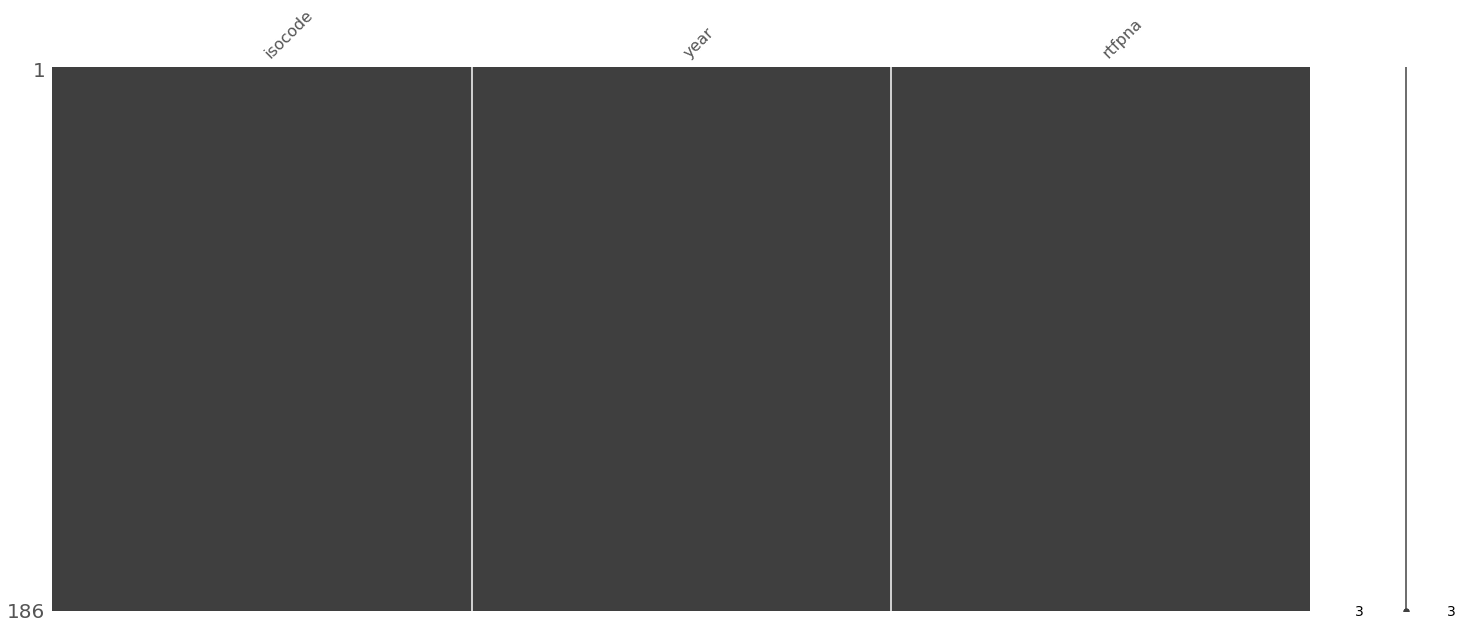

In [162]:
print('There is no null values in this dataset')

plt.figure(figsize=(6,4))
msno.matrix(train)
plt.show()

In [163]:
train.dtypes

isocode     object
year         int64
rtfpna     float64
dtype: object

### Data distribution

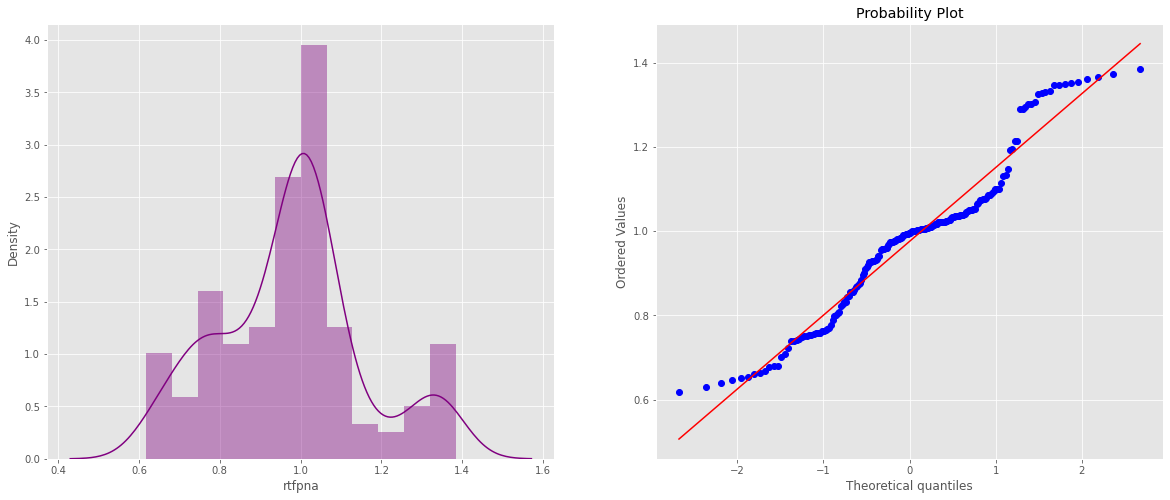

In [164]:
# sets the figure size in inches
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(train['rtfpna'], color="purple")
#plt.xlim(130,200)

plt.subplot(1,2,2)
# Probability plot
stats.probplot(train['rtfpna'], plot=plt)

plt.show()

# 5.0 EDA - Exploratory data analysis


## American data distribution

In [165]:
train[train['isocode'] == 'USA'].describe()

,year,rtfpna
count,62.000000,62.000000
mean,1980.500000,0.803824
std,18.041619,0.116121
min,1950.000000,0.617148
25%,1965.250000,0.739949
50%,1980.500000,0.766047
75%,1995.750000,0.880544
max,2011.000000,1.020392


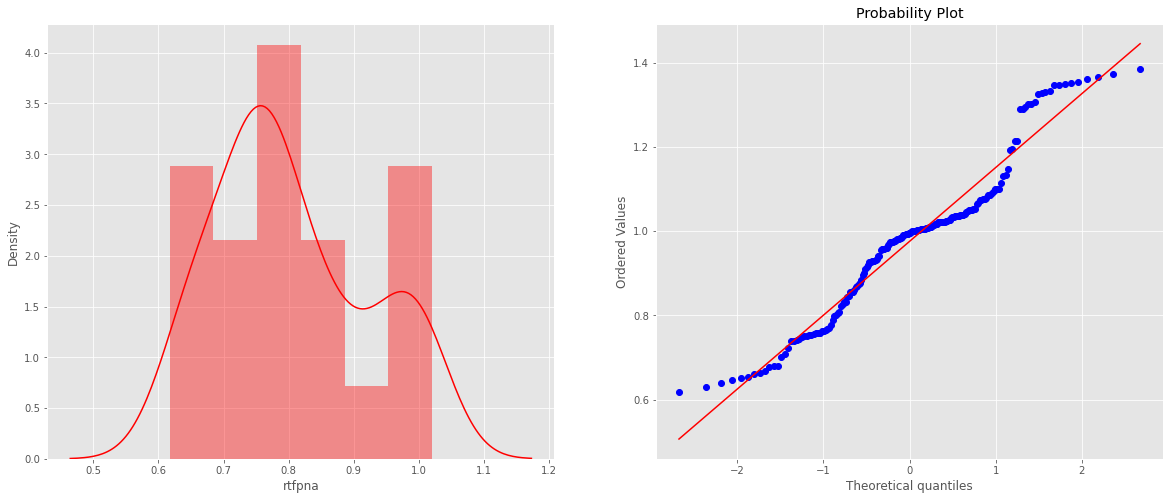

In [166]:
# sets the figure size in inches
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(train[train['isocode'] == 'USA']['rtfpna'], color="red")
#plt.xlim(130,200)

plt.subplot(1,2,2)
# Probability plot
stats.probplot(train['rtfpna'], plot=plt)

plt.show()

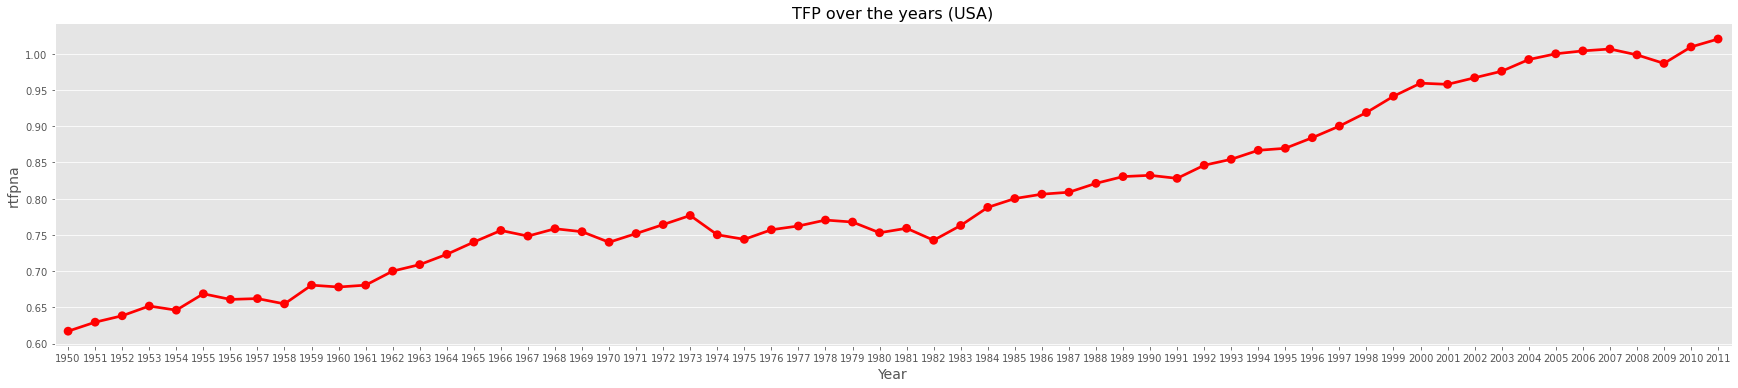

In [167]:
axes = sns.factorplot('year', 'rtfpna',
                      data=train[train['isocode'] == 'USA'], aspect = 4.8, color='red')
plt.title('TFP over the years (USA)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('rtfpna', fontsize=14)
plt.show()

## Canadian data distribution

In [168]:
train[train['isocode'] == 'CAN'].describe()

,year,rtfpna
count,62.000000,62.000000
mean,1980.500000,0.992886
std,18.041619,0.050126
min,1950.000000,0.843335
25%,1965.250000,0.973294
50%,1980.500000,1.004211
75%,1995.750000,1.029513
max,2011.000000,1.066104


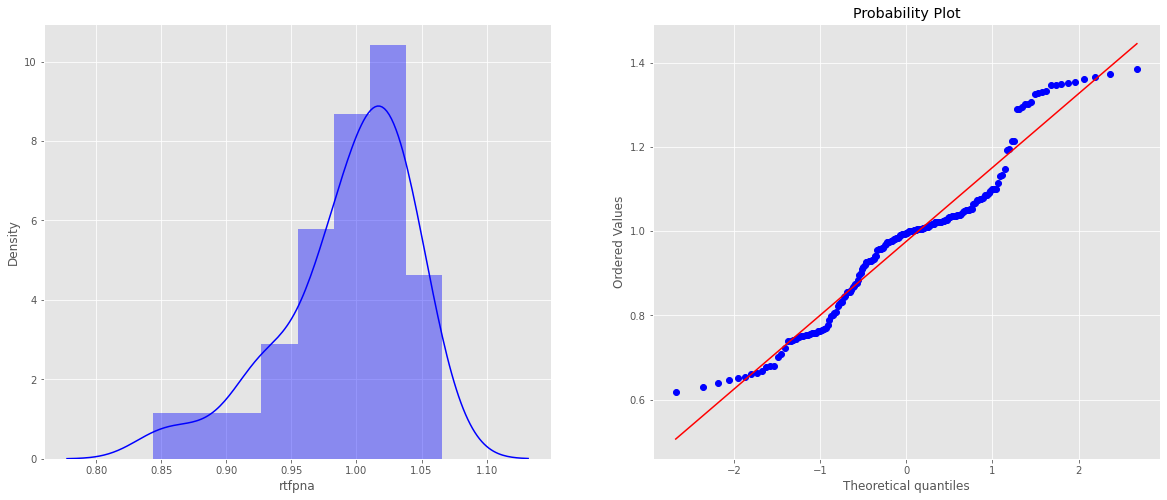

In [169]:
# sets the figure size in inches
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(train[train['isocode'] == 'CAN']['rtfpna'], color="blue")
#plt.xlim(130,200)

plt.subplot(1,2,2)
# Probability plot
stats.probplot(train['rtfpna'], plot=plt)

plt.show()

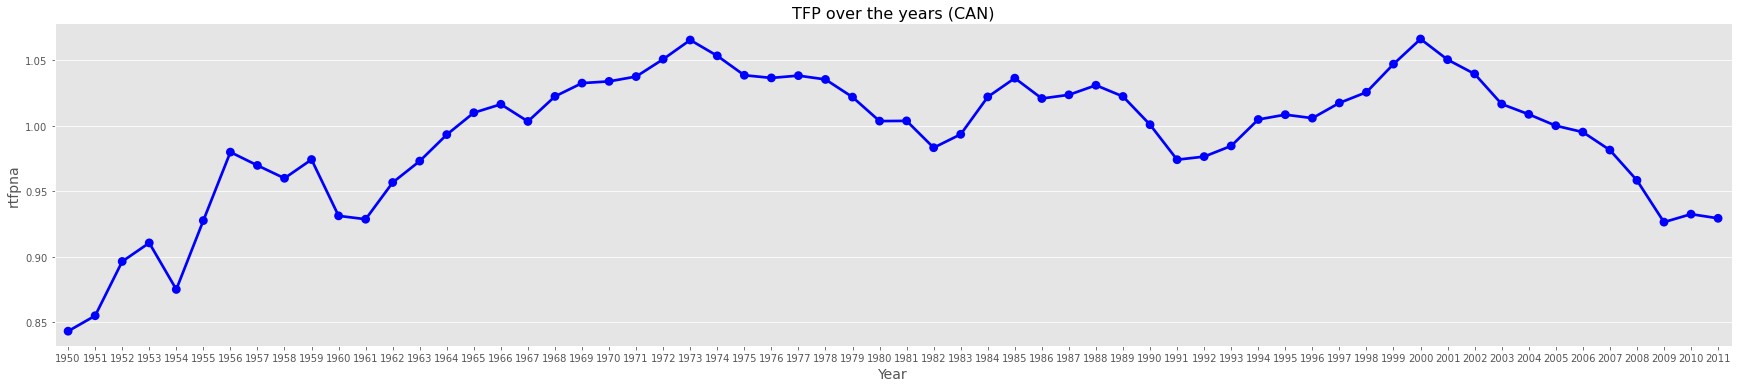

In [170]:
axes = sns.factorplot('year', 'rtfpna',
                      data=train[train['isocode'] == 'CAN'], aspect = 4.8, color='blue')
plt.title('TFP over the years (CAN)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('rtfpna', fontsize=14)
plt.show()

## Mexican data distribution

In [171]:
train[train['isocode'] == 'MEX'].describe()

,year,rtfpna
count,62.000000,62.000000
mean,1980.500000,1.130132
std,18.041619,0.158209
min,1950.000000,0.798159
25%,1965.250000,1.012231
50%,1980.500000,1.093859
75%,1995.750000,1.299591
max,2011.000000,1.383718


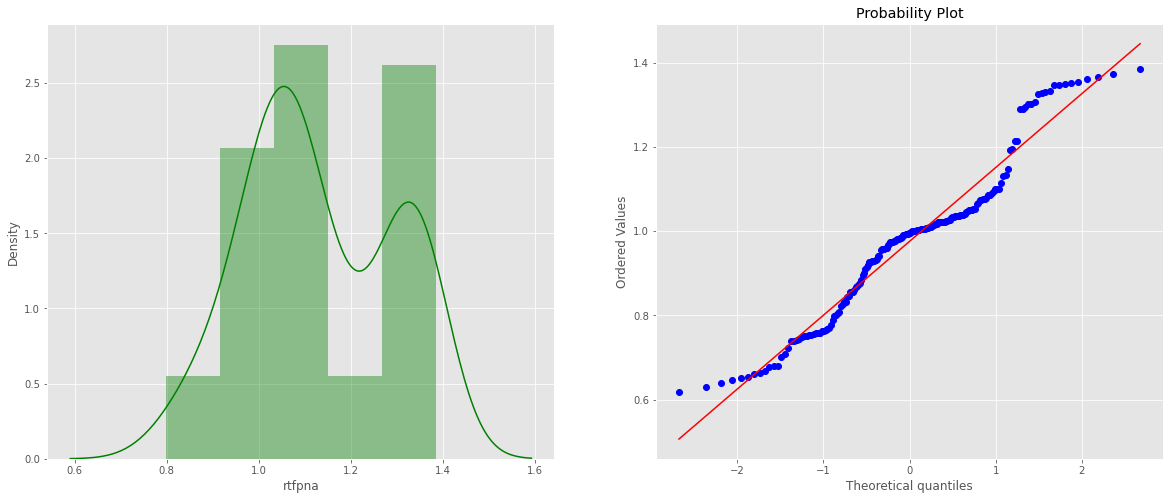

In [172]:
# sets the figure size in inches
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(train[train['isocode'] == 'MEX']['rtfpna'], color="green")
#plt.xlim(130,200)

plt.subplot(1,2,2)
# Probability plot
stats.probplot(train['rtfpna'], plot=plt)

plt.show()

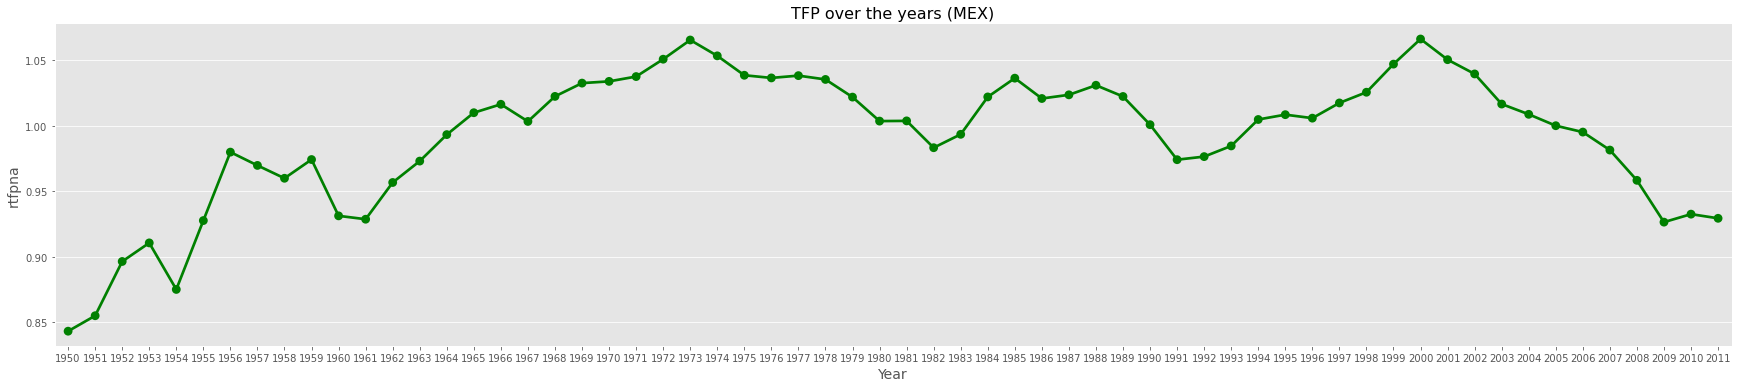

In [173]:
axes = sns.factorplot('year', 'rtfpna',
                      data=train[train['isocode'] == 'CAN'], aspect = 4.8, color='green')
plt.title('TFP over the years (MEX)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('rtfpna', fontsize=14)
plt.show()

### Boxplot containing all the three countries

- There is no evidence of outliers

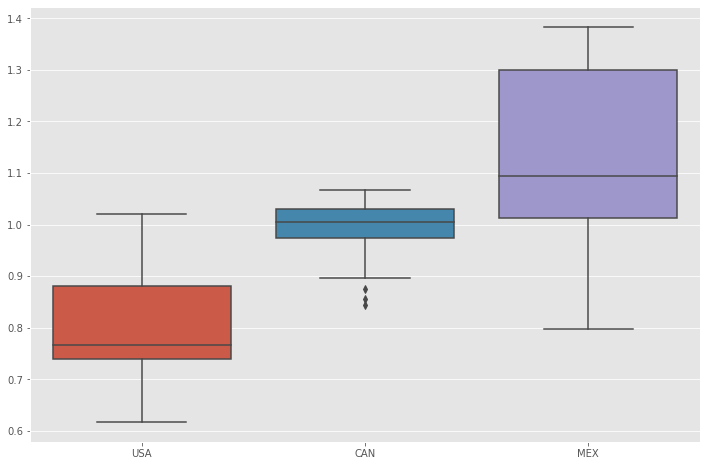

In [174]:
plt.figure(figsize=(12,8))
boxplot(train, x='isocode', y='rtfpna')
plt.show()

### Scatterplot containing all data

This chart is just to check any possible outliers


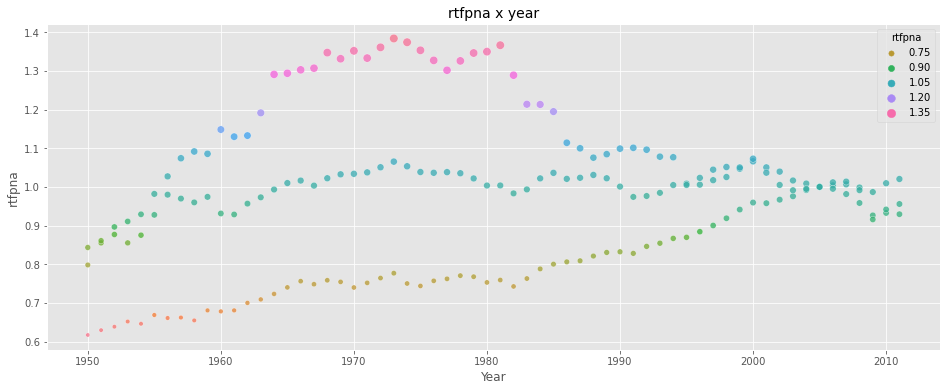

In [175]:
print('This chart is just to check any possible outliers')

# sets plot size
plt.figure(figsize=(16,6))
sns.scatterplot(x='year', y='rtfpna', data=train, hue='rtfpna', size='rtfpna', palette="husl", alpha=0.75)
plt.xlabel("Year")
plt.ylabel("rtfpna")
plt.title("rtfpna x year", fontsize=14)

# displays the plot
plt.show()

___

# 6.0 Time Series analysis

## American Time Series

- Checking trend and seasonality

In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose

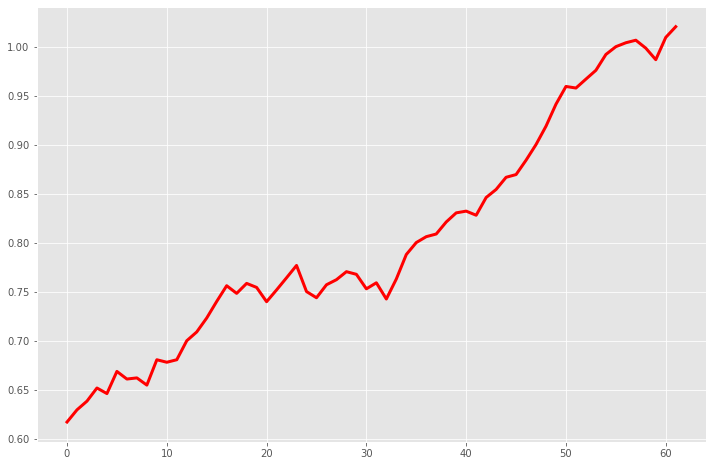

In [177]:
plt.figure(figsize=(12,8))
train[train['isocode'] == 'USA']['rtfpna'].plot(kind='line', linewidth=3, color='red')
plt.show()

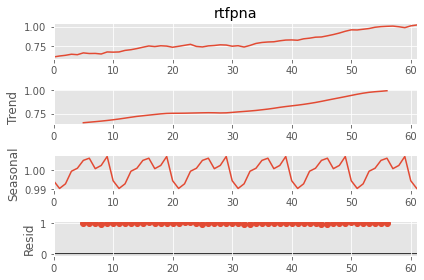

In [178]:
USA_ = seasonal_decompose(train[train['isocode'] == 'USA']['rtfpna'], model='multiplicative', period=10)
USA_.plot()
plt.show()

<AxesSubplot:>

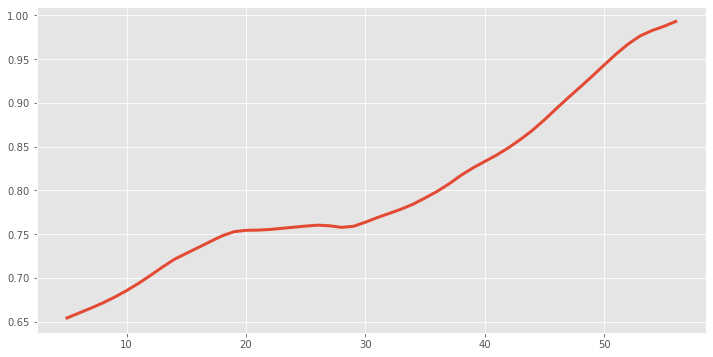

In [179]:
USA_.trend.plot(figsize=(12,6), linewidth=3)

<AxesSubplot:>

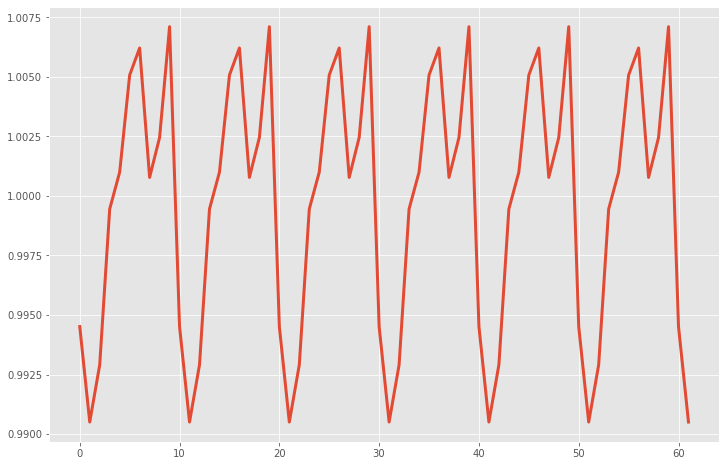

In [180]:
USA_.seasonal.plot(figsize=(12,8), linewidth=3)

Trend = True

Seasonality = True

___

## Canadian Time Series

- Checking trend and seasonality

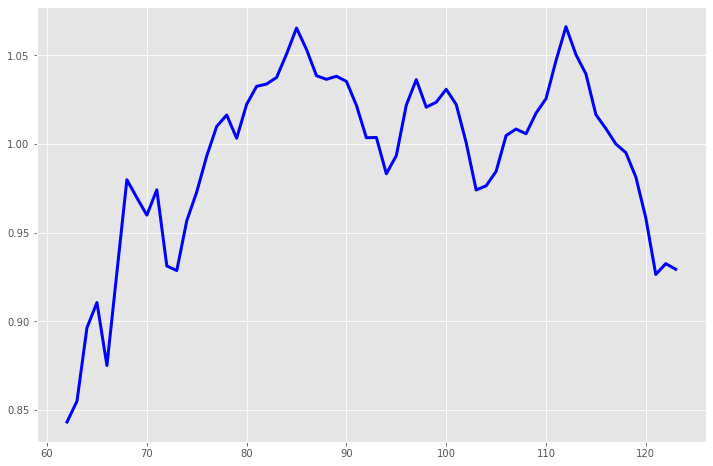

In [181]:
plt.figure(figsize=(12,8))
train[train['isocode'] == 'CAN']['rtfpna'].plot(kind='line', linewidth=3, color='blue')
plt.show()

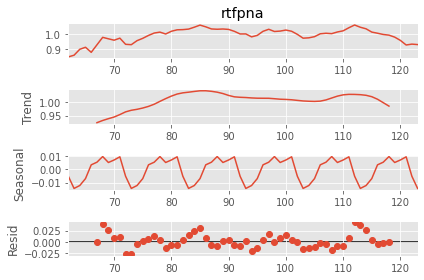

In [182]:
CAN_ = seasonal_decompose(train[train['isocode'] == 'CAN']['rtfpna'], model='aditive', period=10)
CAN_.plot()
plt.show()

<AxesSubplot:>

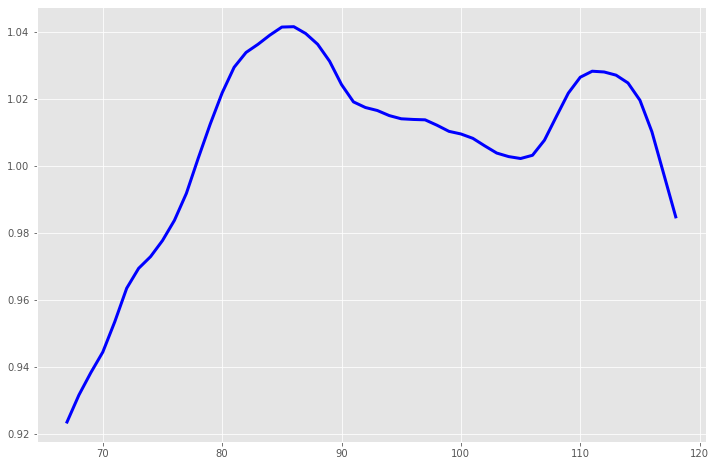

In [183]:
CAN_.trend.plot(figsize=(12,8), color='blue', linewidth=3)

<AxesSubplot:>

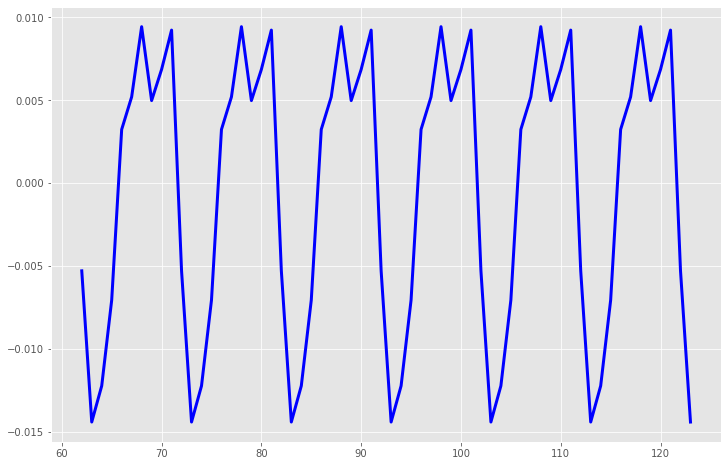

In [184]:
CAN_.seasonal.plot(figsize=(12,8), color='blue', linewidth=3)

Trend = False

Seasonality = True

___

## Mexican tiome series

- Checking trend and seasonality

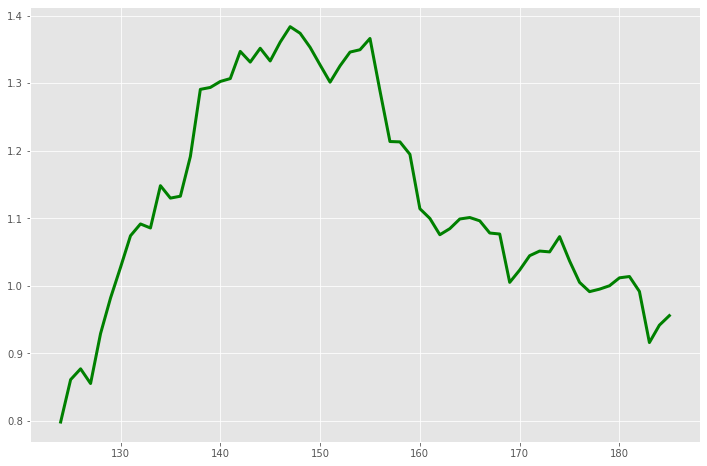

In [185]:
plt.figure(figsize=(12,8))
train[train['isocode'] == 'MEX']['rtfpna'].plot(kind='line', linewidth=3, color='green')
plt.show()

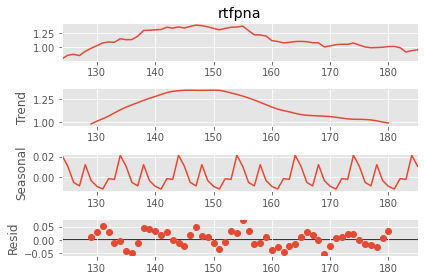

In [186]:
MEX_ = seasonal_decompose(train[train['isocode'] == 'MEX']['rtfpna'], model='aditive', period=10)
MEX_.plot()
plt.show()

<AxesSubplot:>

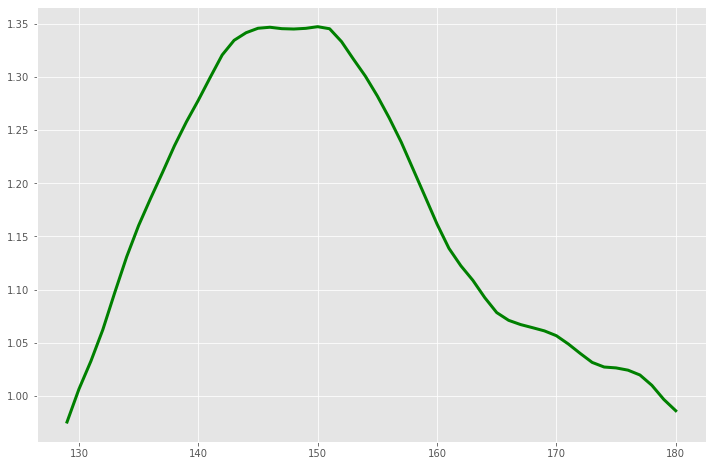

In [187]:
MEX_.trend.plot(figsize=(12,8), color='green', linewidth=3)

<AxesSubplot:>

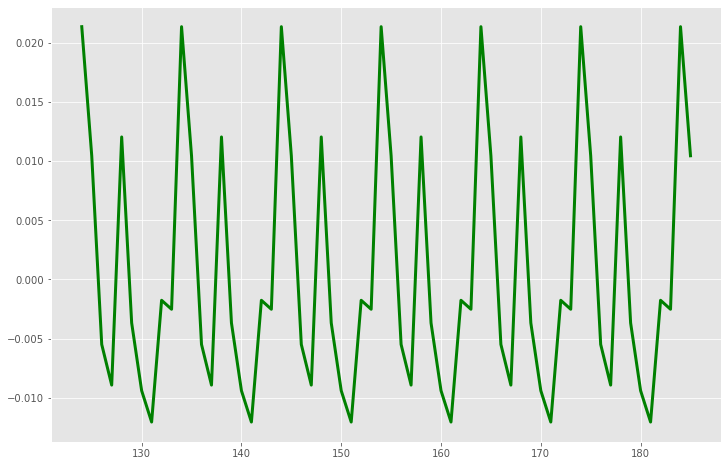

In [188]:
MEX_.seasonal.plot(figsize=(12,8), color='green', linewidth=3)

Trend = False

Seasonality = True

___

## 7.0 Data Preparation

In [189]:
train_USA = train[train['isocode'] == 'USA']
train_CAN = train[train['isocode'] == 'CAN']
train_MEX = train[train['isocode'] == 'MEX']

In [190]:
train_data_USA = train_USA.iloc[:52]
test_data_USA = train_USA.iloc[52:]
train_data_CAN = train_CAN.iloc[:52]
test_data_CAN = train_CAN.iloc[52:]
train_data_MEX = train_MEX.iloc[:52]
test_data_MEX = train_MEX.iloc[52:]

___

## 8.0 Machine learning modeling

### - Time series forecast for USA - Holt Winters

In [191]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [192]:
fitted_model = ExponentialSmoothing(train_data_USA['rtfpna'], trend='add', seasonal='add', seasonal_periods=10).fit()

In [193]:
test_predictions = fitted_model.forecast(10)

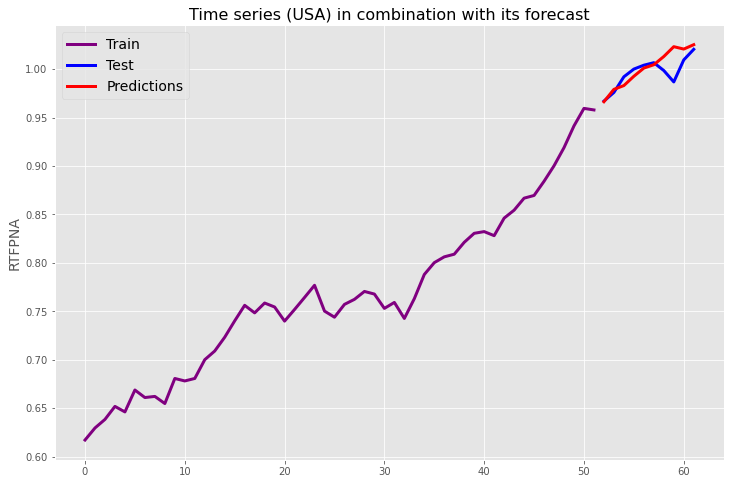

In [194]:
plt.figure(figsize=(12,8))
train_data_USA['rtfpna'].plot(linewidth=3, color='purple')
test_data_USA['rtfpna'].plot(linewidth=3, color='blue')
test_predictions.plot(linewidth=3, color='red')
plt.title('Time series (USA) in combination with its forecast', fontsize=16)
plt.ylabel('RTFPNA', fontsize=14)
plt.legend(['Train', 'Test', 'Predictions'], fontsize=14)
plt.show()

### Metrics

- MAE and MSE

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [196]:
mean_absolute_error(test_data_USA['rtfpna'], test_predictions)

0.009216050833107826

In [197]:
mean_squared_error(test_data_USA['rtfpna'], test_predictions)

0.00018416316275154232

###  10 years forecast - USA


In [198]:
fitted_model_10 = ExponentialSmoothing(train_USA['rtfpna'], trend='add', seasonal='add', seasonal_periods=10).fit()


In [199]:
USA_predictions = fitted_model_10.forecast(10)

### - Prediction for the next 10 years - USA

In [200]:
predictions_USA_TFP = pd.DataFrame(USA_predictions, columns=['TFP_USA'])
predictions_USA_TFP

,TFP_USA
62,1.028950
63,1.041038
64,1.046928
65,1.056265
66,1.063942
67,1.067239
68,1.072852
69,1.079334
70,1.081080
71,1.086568


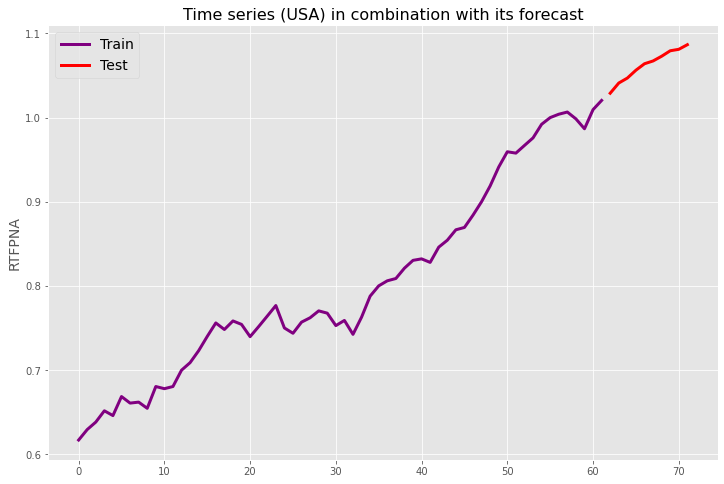

In [201]:
plt.figure(figsize=(12,8))
train_USA['rtfpna'].plot(linewidth=3, color='purple')
USA_predictions.plot(linewidth=3, color='red')
plt.title('Time series (USA) in combination with its forecast', fontsize=16)
plt.ylabel('RTFPNA', fontsize=14)
plt.legend(['Train', 'Test', 'Predictions'], fontsize=14)

plt.show()

___


### - Time series forecast for CAN - ARIMA

In [202]:
from statsmodels.tsa.stattools import adfuller

In [203]:
X_CAN = train_CAN['rtfpna']
result = adfuller(X_CAN)
result
print('ADF Statistics: %f' % result[0])
print('P value: %f' % result[1])
print('Critical values: ')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If p>0.05 - Time series is not stationary

ADF Statistics: -3.027753
P value: 0.032383
Critical values: 
	1%: -3.544
	5%: -2.911
	10%: -2.593


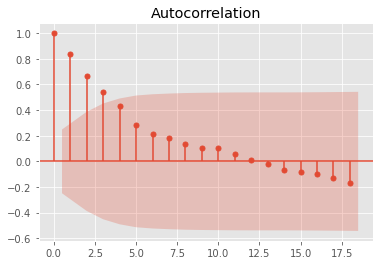

In [204]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_CAN['rtfpna'])
plt.show()

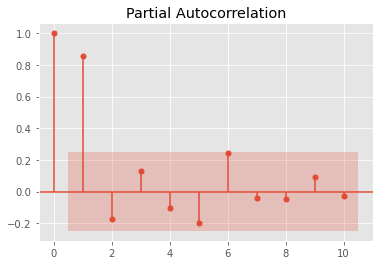

In [205]:
plot_pacf(train_CAN['rtfpna'], lags=10)
plt.show()

In [206]:
from pmdarima.arima import auto_arima

In [207]:
stepwise_model = auto_arima(train_CAN['rtfpna'], start_p=1, start_q=1, max_p=40, max_q=40, m=1, start_P=0, max_P=10, seasonal=True, D=1, trace=True, error_action='ignore', supress_warnings=True, stepwise=False)

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=-275.956, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=-298.669, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=-301.382, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=-300.902, Time=0.08 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=-300.949, Time=0.13 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=-301.088, Time=0.19 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=-278.250, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=-298.532, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=-301.715, Time=0.11 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=-300.920, Time=0.16 sec
 ARIMA(1,2,4)(0,0,0)[1]             : AIC=-300.293, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[1]             : AIC=-298.321, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[1]             : AIC=-301.272, Time=0.15 sec
 ARIMA(2,2,2)(0,0,0)[1]             : AIC=-301.964, Time=0.15 sec
 ARIMA(2,2,3)(0,0,0)[1]             : AIC=-303.876, Time=0.18 sec
 ARIMA(3,2

In [208]:
Years = list(range(124,134))

In [209]:
print(stepwise_model.aic())

-303.8760180230409


In [210]:
stepwise_model.fit(train_CAN['rtfpna'])

ARIMA(order=(2, 2, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True, with_intercept=False)

In [211]:
future_forecast_CAN = stepwise_model.predict(n_periods=10)

In [212]:
new_future_forecast_CAN = pd.DataFrame(future_forecast_CAN, index = Years, columns=['TFP_CAN'])
new_future_forecast_CAN

,TFP_CAN
124,0.914370
125,0.906391
126,0.906275
127,0.894928
128,0.886328
129,0.883952
130,0.874791
131,0.866196
132,0.862197
133,0.854270


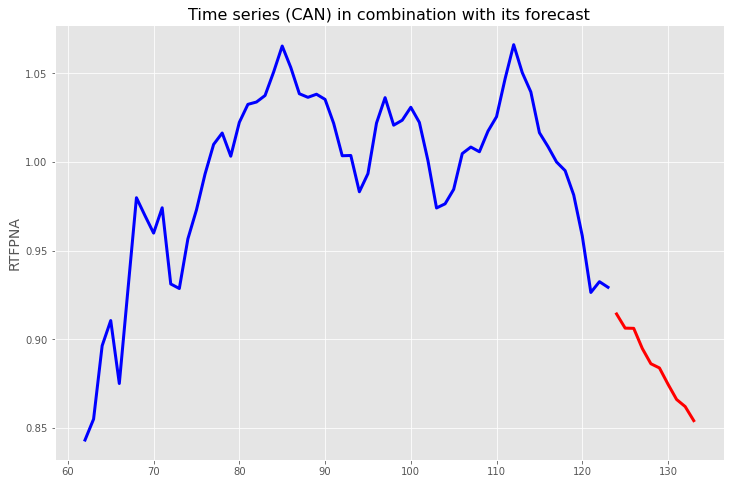

In [213]:
plt.figure(figsize=(12,8))
train_CAN['rtfpna'].plot(linewidth=3, color='blue')
new_future_forecast_CAN['TFP_CAN'].plot(linewidth=3, color='red')
plt.title('Time series (CAN) in combination with its forecast', fontsize=16)
plt.ylabel('RTFPNA', fontsize=14)

plt.show()

___

### - Time series forecast for MEX - ARIMA

In [214]:
X_MEX = train_MEX['rtfpna']
result = adfuller(X_MEX)
result
print('ADF Statistics: %f' % result[0])
print('P value: %f' % result[1])
print('Critical values: ')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If p>0.05 - Time series is not stationary

ADF Statistics: -1.940444
P value: 0.313281
Critical values: 
	1%: -3.563
	5%: -2.919
	10%: -2.597


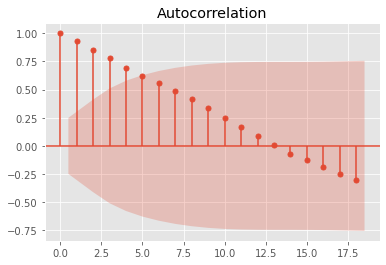

In [215]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_MEX['rtfpna'])
plt.show()

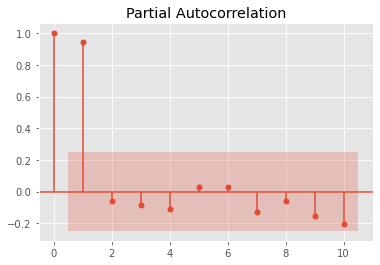

In [216]:
plot_pacf(train_MEX['rtfpna'], lags=10)
plt.show()

In [217]:
Years_MEX = list(range(186,196))

In [218]:
stepwise_model_MEX = auto_arima(train_MEX['rtfpna'], start_p=1, start_q=1, max_p=40, max_q=40, m=1, start_P=0, max_P=10, seasonal=True, D=1, trace=True, error_action='ignore', supress_warnings=True, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-49.696, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-113.663, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-173.333, Time=0.10 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-201.095, Time=0.19 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-208.018, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-228.290, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-230.827, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-228.925, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-227.277, Time=0.17 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-228.028, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-231.115, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-228.871, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-229.739, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[

In [219]:
print(stepwise_model_MEX.aic())

-231.11543098938793


In [220]:
stepwise_model.fit(train_MEX['rtfpna'])

ARIMA(order=(2, 2, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True, with_intercept=False)

In [221]:
future_forecast_MEX = stepwise_model_MEX.predict(n_periods=10)

In [222]:
new_future_forecast_MEX = pd.DataFrame(future_forecast_MEX, index = Years_MEX, columns=['TFP_MEX'])
new_future_forecast_MEX

,TFP_MEX
186,0.960662
187,0.962859
188,0.964253
189,0.965391
190,0.966433
191,0.967424
192,0.968378
193,0.969302
194,0.970196
195,0.971061


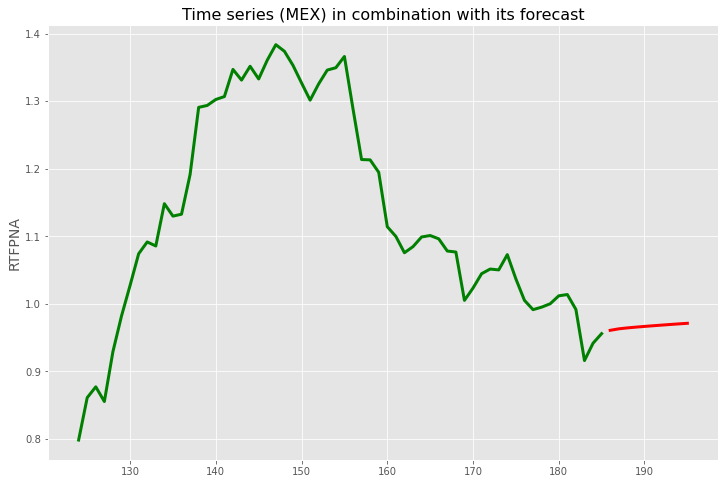

In [223]:
plt.figure(figsize=(12,8))
train_MEX['rtfpna'].plot(linewidth=3, color='green')
new_future_forecast_MEX['TFP_MEX'].plot(linewidth=3, color='red')
plt.title('Time series (MEX) in combination with its forecast', fontsize=16)
plt.ylabel('RTFPNA', fontsize=14)

plt.show()

___

# 9.0 Conclusion

In [279]:
years = pd.DataFrame(range(2012,2022), columns=['year'])

In [282]:
summary1 = pd.DataFrame(list(predictions_USA_TFP['TFP_USA']), columns=['TFP_USA'])
summary2 = pd.DataFrame(list(new_future_forecast_CAN['TFP_CAN']), columns=['TFP_CAN'])
summary3 = pd.DataFrame(list(new_future_forecast_MEX['TFP_MEX']), columns=['TFP_MEX'])

Summary = pd.concat([summary1, summary2, summary3, years], axis=1).set_index(['year'])
Summary

,TFP_USA,TFP_CAN,TFP_MEX
year,,,
2012,1.028950,0.914370,0.960662
2013,1.041038,0.906391,0.962859
2014,1.046928,0.906275,0.964253
2015,1.056265,0.894928,0.965391
2016,1.063942,0.886328,0.966433
2017,1.067239,0.883952,0.967424
2018,1.072852,0.874791,0.968378
2019,1.079334,0.866196,0.969302
2020,1.081080,0.862197,0.970196


The problem presented two scenarios, the USA prediction containing trend and seasonality but MEX and CAN didn't present any of them. It was decided to use Holt Winters for USA and ARIMA for MEX and CAN.

Just to remember, CAN time series was already stationary according to AD FuLLER test. 

Considering the short leadtime to present the test results, it was not possible to apply other algorithms. RSME is the most important prediction for this problem since it also has the effect of putting more weight on large errors.

___

## References

https://en.wikipedia.org/wiki/Total_factor_productivity

https://porque.com.br/cards/o-que-e-a-produtividade-total-dos-fatores/